In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import glob
import math

In [3]:
path = r'C:\Users\khanf\Documents\PROJECT\FB_1HOUR_5nzke0'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

fb = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [4]:
fb.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE
0,2012.05.18 11:00:00,42.05,45.00,38.86,38.00,2119935,422063,40.464
1,2012.05.18 12:00:00,38.85,42.00,41.01,38.01,918855,398534,40.442
2,2012.05.18 13:00:00,41.00,42.00,40.17,40.13,555244,212849,41.094
3,2012.05.18 14:00:00,40.15,42.00,39.13,38.00,696831,206701,40.131
4,2012.05.18 15:00:00,39.13,40.25,38.18,38.00,1078805,226303,38.197


In [5]:
# fb = pd.DataFrame(fb.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
fb[['DATE','TIME']] = fb.DATETIME.str.split(expand=True)
fb[["YEAR", "MONTH", "DAY"]] = fb.DATE.str.split(".", expand=True)

In [9]:
fb.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY
0,2012.05.18 11:00:00,42.05,45.00,38.86,38.00,2119935,422063,40.464,2012.05.18,11:00:00,2012,05,18
1,2012.05.18 12:00:00,38.85,42.00,41.01,38.01,918855,398534,40.442,2012.05.18,12:00:00,2012,05,18
2,2012.05.18 13:00:00,41.00,42.00,40.17,40.13,555244,212849,41.094,2012.05.18,13:00:00,2012,05,18
3,2012.05.18 14:00:00,40.15,42.00,39.13,38.00,696831,206701,40.131,2012.05.18,14:00:00,2012,05,18
4,2012.05.18 15:00:00,39.13,40.25,38.18,38.00,1078805,226303,38.197,2012.05.18,15:00:00,2012,05,18


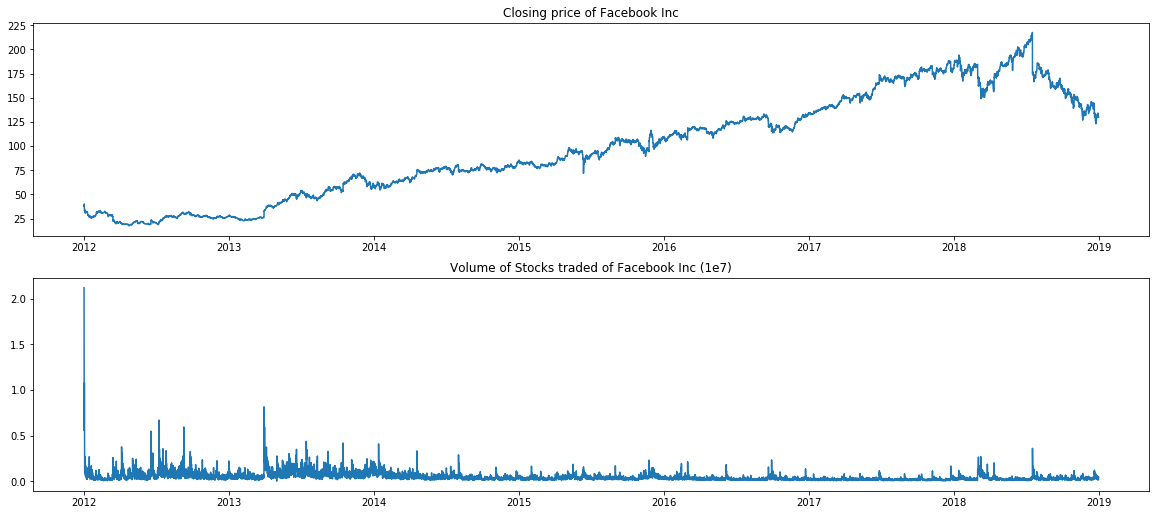

In [14]:
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2012, 2019, num = 11602)
ax[0].plot(date, fb['CLOSE'])
ax[0].set_title('Closing price of Facebook Inc')

ax[1].plot(date, fb['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of Facebook Inc (1e7)')


plt.show()